# Project: Wrangling and Analyze Data

In [1]:
#importing the packages to be used for this data wrangling effort
import pandas as pd
import numpy as np
import requests
import json
%matplotlib inline
import matplotlib.pyplot as plt
import re

In [2]:
#reading the twitter archive into a dataframe
twitter_data=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
url= 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(url.split('/')[-1],mode='wb') as file:
    file.write(response.content)
#read the tsv file into a pandas dataframe 'tweet_data'
tweet_image=pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [8]:
#reading extra data from twitter into a json.txt file
df_3 = []
with open('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        df_3.append({'tweet_id' : tweet_id,
                     'retweet_count' : retweet_count,
                     'favorite_count' : favorite_count,
                       })
        
#saving the json.txt file to a dataframe "extra_data"
extra_data=pd.DataFrame(df_3,columns=[ 'tweet_id','retweet_count','favorite_count'])

## VISUAL ASSESSMENT OF THE DATA GATHERED

In [9]:
#reading the twitter data dataframe for visual assessment
twitter_data

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [10]:
#reading tweet_image dataframe for visual assessment
tweet_image

tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221509120    https://pbs.twimg.com/media/CT5cN_3WEAAlOoZ.jpg   
12    666073100786774016    https://pbs.twimg.com/media/CT5d9DZXAAALcwe.jpg   
13    666082916733198337    https://pbs.twimg.com/media/CT5m4VGWEAAtKc8.jpg   
14    666094000022159362    https://pbs.twimg.com/media/CT5w9gUW4AAsBNN.jpg   
15    666099513787052032    https://pbs.twimg.com/media/CT51-JJUEAA6hV8.jpg   
16    666102155909144576    https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg   
17    666104133288665088    https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg   
18    666268910803644416    https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg   
19    666273097616637952    https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg   
20    666287406224695296    https://pbs.twimg.com/media/CT8g3BpUEAAuFjg.jpg   
21    666293911632134144    https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg   
22    666337882303524864    https://pbs.twimg.com/media/CT9OwFIWEAMuRje.jpg   
23    666345417576210432    https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg   
24    666353288456101888    https://pbs.twimg.com/media/CT9cx0tUEAAhNN_.jpg   
25    666362758909284353    https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg   
26    666373753744588802    https://pbs.twimg.com/media/CT9vZEYWUAAlZ05.jpg   
27    666396247373291520    https://pbs.twimg.com/media/CT-D2ZHWIAA3gK1.jpg   
28    666407126856765440    https://pbs.twimg.com/media/CT-NvwmW4AAugGZ.jpg   
29    666411507551481857    https://pbs.twimg.com/media/CT-RugiWIAELEaq.jpg   
...                  ...                                                ...   
2045  886366144734445568    https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg   
2046  886680336477933568    https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg   
2047  886736880519319552    https://pbs.twimg.com/media/DE5Se8FXcAAJFx4.jpg   
2048  886983233522544640    https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg   
2049  887101392804085760    https://pbs.twimg.com/media/DE-eAq6UwAA-jaE.jpg   
2050  887343217045368832  https://pbs.twimg.com/ext_tw_video_thumb/88734...   
2051  887473957103951883    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2052  887517139158093824  https://pbs.twimg.com/ext_tw_video_thumb/88751...   
2053  887705289381826560    https://pbs.twimg.com/media/DFHDQBbXgAEqY7t.jpg   
2054  888078434458587136    https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg   
2055  888202515573088257    https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg   
2056  888554962724278272    https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg   
2057  888804989199671297    https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg   
2058  888917238123831296    https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg   
2059  889278841981685760  https://pbs.twimg.com/ext_tw_video_thumb/88927...   
2060  889531135344209921    https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg   
2061  889638837579907072    https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg   
2062  889665388333682689    https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg   
2063  889880896479866881    https://pbs.twimg.com/media/DFl99B1WsA

In [11]:
#reading extra_data from twitter's api for visual assessment
extra_data

tweet_id  retweet_count  favorite_count
0     892420643555336193           6968           33687
1     892177421306343426           5272           29205
2     891815181378084864           3464           21962
3     891689557279858688           7190           36772
4     891327558926688256           7712           35134
5     891087950875897856           2581           17723
6     890971913173991426           1646           10316
7     890729181411237888          15675           56580
8     890609185150312448           3602           24416
9     890240255349198849           6066           27838
10    890006608113172480           6113           26921
11    889880896479866881           4140           24466
12    889665388333682689           8300           41866
13    889638837579907072           3700           23548
14    889531135344209921           1873           13308
15    889278841981685760           4419           21986
16    888917238123831296           3742           25499
17    888804989199671297           3510           22364
18    888554962724278272           2862           17233
19    888078434458587136           2884           19088
20    887705289381826560           4514           26517
21    887517139158093824           9805           40534
22    887473957103951883          14950           59921
23    887343217045368832           8773           29449
24    887101392804085760           4967           26870
25    886983233522544640           6284           30224
26    886736880519319552           2615           10457
27    886680336477933568           3718           19651
28    886366144734445568           2612           18476
29    886267009285017600              4             105
...                  ...            ...             ...
2297  666411507551481857            261             370
2298  666407126856765440             30              93
2299  666396247373291520             68             147
2300  666373753744588802             73             162
2301  666362758909284353            466             649
2302  666353288456101888             56             178
2303  666345417576210432            121             242
2304  666337882303524864             79             168
2305  666293911632134144            288             425
2306  666287406224695296             55             123
2307  666273097616637952             66             151
2308  666268910803644416             38              98
2309  666104133288665088           5454           12838
2310  666102155909144576             11              66
2311  666099513787052032             53             134
2312  666094000022159362             63             141
2313  666082916733198337             37              92
2314  666073100786774016            129             273
2315  666071193221509120             50             127
2316  666063827256086533            180             394
2317  666058600524156928             47              99
2318  666057090499244032            111             247
2319  666055525042405380            196             367
2320  666051853826850816            698            1023
2321  666050758794694657             50             115
2322  666049248165822465             36              88
2323  666044226329800704            115             245
2324  666033412701032449             36             100
2325  666029285002620928             39             112
2326  666020888022790149            419            2282

[2327 rows x 3 columns]

## PROGRAMMATIC ASSESSMENT OF GATHERED DATA

In [12]:
#inspecting the first 5 rows of the twitter_data dataframe to check for posssible errors
twitter_data.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [13]:
#inspecting the datatypes of the various columns in the twitter_data dataframe
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#checkinhg for null values in twitter_data
twitter_data.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [15]:
#inspecting twitter_data for duplicate values in tweet_id column
twitter_data.tweet_id.duplicated().sum()

0

In [16]:
#programmatic assessment of expanded_urls column for possible duplicates
twitter_data.expanded_urls.duplicated().sum()

137

In [17]:
#checking for duplicated rows in text column
twitter_data.text.duplicated().sum()

0

In [18]:
#assessing for the number of unique rows in name column if any
twitter_data.name.nunique()

957

In [19]:
#assessing the number of rows in the name column of twitter_data dataframe
twitter_data.name.value_counts()

None            745
a                55
Charlie          12
Cooper           11
Oliver           11
Lucy             11
Lola             10
Tucker           10
Penny            10
Bo                9
Winston           9
the               8
Sadie             8
an                7
Buddy             7
Daisy             7
Toby              7
Bailey            7
Koda              6
Jack              6
Rusty             6
Leo               6
Oscar             6
Dave              6
Bella             6
Jax               6
Stanley           6
Scout             6
Milo              6
Sammy             5
               ... 
Reptar            1
Carper            1
Link              1
Iggy              1
Puff              1
Fwed              1
Jeb               1
Marlee            1
Strudel           1
Brandi            1
Shelby            1
Cheryl            1
Cora              1
Simba             1
Jessiga           1
Flurpson          1
Severus           1
Opie              1
Sweets            1


In [20]:
#filtering the rows with 'none' in the name column of the twitter_data dataframe
twitter_data.query('name=="None"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
5     891087950875897856                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
30    886267009285017600           8.862664e+17         2.281182e+09   
32    886054160059072513                    NaN                  NaN   
35    885518971528720385                    NaN                  NaN   
37    885167619883638784                    NaN                  NaN   
41    884441805382717440                    NaN                  NaN   
42    884247878851493888                    NaN                  NaN   
47    883117836046086144                    NaN                  NaN   
55    881633300179243008           8.816070e+17         4.738443e+07   
59    880872448815771648                    NaN                  NaN   
62    880095782870896641                    NaN                  NaN   
64    879674319642796034           8.795538e+17         3.105441e+09   
72    878604707211726852                    NaN                  NaN   
78    877611172832227328                    NaN                  NaN   
83    876537666061221889                    NaN                  NaN   
88    875097192612077568                    NaN                  NaN   
89    875021211251597312                    NaN                  NaN   
93    874057562936811520                    NaN                  NaN   
96    873580283840344065                    NaN                  NaN   
99    872967104147763200                    NaN                  NaN   
100   872820683541237760                    NaN                  NaN   
101   872668790621863937                    NaN                  NaN   
103   872486979161796608                    NaN                  NaN   
110   871102520638267392                    NaN                  NaN   
112   870804317367881728                    NaN                  NaN   
113   870726314365509632           8.707262e+17         1.648776e+07   
...                  ...                    ...                  ...   
2294  667138269671505920                    NaN                  NaN   
2298  667070482143944705           6.670655e+17         4.196984e+09   
2299  667065535570550784                    NaN                  NaN   
2301  667044094246576128                    NaN                  NaN   
2305  666837028449972224                    NaN                  NaN   
2306  666835007768551424                    NaN                  NaN   
2307  666826780179869698                    NaN                  NaN   
2310  666786068205871104                    NaN                  NaN   
2316  666649482315059201                    NaN                  NaN   
2320  666437273139982337                    NaN                  NaN   
2321  666435652385423360                    NaN                  NaN   
2322  666430724426358785                    NaN                  NaN   
2323  666428276349472768                    NaN                  NaN   
2324  666421158376562688                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN         

In [21]:
#filtering the rows with 'the' in the name column of the twitter_data dataframe
twitter_data.query('name=="the"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1527  690360449368465409                    NaN                  NaN   
1603  685943807276412928                    NaN                  NaN   
1797  677269281705472000                    NaN                  NaN   
1815  676613908052996102                    NaN                  NaN   
2037  671561002136281088                    NaN                  NaN   
2212  668587383441514497                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   

                      timestamp  \
1527  2016-01-22 02:28:52 +0000   
1603  2016-01-09 21:58:42 +0000   
1797  2015-12-16 23:29:14 +0000   
1815  2015-12-15 04:05:01 +0000   
2037  2015-12-01 05:26:34 +0000   
2212  2015-11-23 00:30:28 +0000   
2345  2015-11-16 01:22:45 +0000   
2346  2015-11-16 01:01:59 +0000   

                                                 source  \
1527  <a href="http://twitter.com/download/iphone" r...   
1603  <a href="http://twitter.com/download/iphone" r...   
1797  <a href="http://twitter.com/download/iphone" r...   
1815  <a href="http://twitter.com/download/iphone" r...   
2037  <a href="http://twitter.com/download/iphone" r...   
2212  <a href="http://vine.co" rel="nofollow">Vine -...   
2345  <a href="http://twitter.com/download/iphone" r...   
2346  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1527  Stop sending in lobsters. This is the final wa...                  NaN   
1603  This is the newly formed pupper a capella grou...                  NaN   
1797  This is the happiest pupper I've ever seen. 10...                  NaN   
1815  This is the saddest/sweetest/best picture I've...                  NaN   
2037  This is the best thing I've ever seen so sprea...                  NaN   
2212  Never forget this vine. You will not stop watc...                  NaN   
2345  This is the happiest dog you will ever see. Ve...                  NaN   
2346  Here is the Rand Paul of retrievers folks! He'...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1527                       NaN                        NaN   
1603                       NaN                        NaN   
1797                       NaN                        NaN   
1815                       NaN                        NaN   
2037                       NaN                        NaN   
2212                       NaN                        NaN   
2345                       NaN                        NaN   
2346                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1527  https://twitter.com/dog_rates/status/690360449...                 9   
1603  https://twitter.com/dog_rates/status/685943807...                 8   
1797  https://twitter.com/dog_rates/status/677269281...                10   
1815  https://twitter.com/dog_rates/status/676613908...                12   
2037  https://twitter.com/dog_rates/status/671561002...                13   
2212                      https://vine.co/v/ea0OwvPTx9l                13   
2345  https://twitter.com/dog_rates/status/666063827...                10   
2346  https://twitter.com/dog_rates/status/666058600...                 8   

      rating_denominator name doggo floofer  pupper puppo  
1527                  10  the  None    None    None  None  
1603                  10  the  None    None  pupper  None  
1797                  10  the  None    None  pupper  None  
1815                  10  the  None    None    None  None  
2037                  10  the  None    None    None  None  
2212                  10  the  None    None    None  None  
2345                  10  the  None    None    None  None  
2346                  10  the  None    None    None  None

In [22]:
#checking for columns with null values in twitter_data dataframe
twitter_data.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [23]:
#statistical assessment of the twitter_data dataframe
twitter_data.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [24]:
#programmatic assessment of the first 5 rows in the tweet_data dataframe
tweet_image.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [25]:
#programmatic assessment of the datatypes in tweet_image dataframe
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
#checking for null values in tweet_image dataframe
tweet_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
#checking for duplicates in the tweet_data dataframe
tweet_image.duplicated().sum()

0

In [28]:
#assessing for duplicates in the tweet_id column
tweet_image.tweet_id.duplicated().sum()

0

In [29]:
#assessing the jpg_url column to count values in each row
tweet_image.jpg_url.isna()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
2073    False
2074    False
Name: jpg_url, Length: 2075, dtype: bool

In [30]:
#assessing for duplicates in the jpg_url column int he tweet_image dataframe
tweet_image.jpg_url.duplicated().sum()

66

In [31]:
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
tweet_image.jpg_url.value_counts()

https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg    2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg    2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg    2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg    2
https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg    2
https://pbs.twimg.com/media/Ct72q9jWcAAhlnw.jpg    2
https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg    2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg    2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg    2
https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg    2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg    2
https://pbs.twimg.com/media/CsVO7ljW8AAckRD.jpg    2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg    2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg    2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg    2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg    2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg    2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg    2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jp

In [33]:
#checking for null_values in img_num column in tweet_data 
tweet_image.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [34]:
#statistical assessment of tweet_image dataframe
tweet_image.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [35]:
#progrramatic assessment of the first 5 rows in the  extra_data dataframe
extra_data.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           6968           33687
1  892177421306343426           5272           29205
2  891815181378084864           3464           21962
3  891689557279858688           7190           36772
4  891327558926688256           7712           35134

In [36]:
#checking the datatypes of extra_data
extra_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
retweet_count     2327 non-null int64
favorite_count    2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [37]:
#assessing extra_data for duplicated values
extra_data.duplicated().sum()

0

In [38]:
#putting all dataframes in a single list
total_gathered_data=pd.Series(list(twitter_data)+list(tweet_image)+list(extra_data))

In [39]:
#assessing the list for duplicated columns
total_gathered_data[total_gathered_data.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

### Quality issues
-TWITER DATA

1.Timestamp is in object format instead of a datetime format

2.Duplicate rows were found in expanded_url

3.Columns name,doggo,floofer,puppo,pupper have null rows represented as 'none' instead of 'NaN'

4.Some names in the name column have ununsual names in its rows such as 'a','an','the'

5.Columns 'in_reply_to_status_id','in_reply_to_user_id' in float format instead of an object format

6.tweet_id is represented as an integer instead of an object datatype as it is a unique object identifier and as such numerical calculations will not be performed on them.

7.retweeted_status_timestamp in object datatype instead of datetime

-TWEET_IMAGE

1.Duplicate rows were found in jpg_url




### Tidiness issues
TWITTER_DATA

1.only original data is needeed, retweet data such as retweeted_status_timestamp,retweeted_status_id,retweeted_status_user_id are not orginal data.

2.in_reply_to_status_id, in_reply_to_user_id are not original tweets as only original tweets are needed

3.various breed_predictions, confidence_levels and dog_tests are spread in different columns

4.all existing dataframes can be merged to form a master dataframe

## Cleaning Data


In [41]:
# Make copies of original pieces of data
twitter_data_clean=twitter_data.copy()
tweet_image_clean=tweet_image.copy()
extra_data_clean=extra_data.copy()

### Quality Issues

### Issue #1: Timestamp is in object format instead of a datetime format

#### Define: change data format in timstamp to datatime format

#### Code

In [42]:
twitter_data_clean['timestamp']=pd.to_datetime(twitter_data_clean['timestamp'])

#### Test

In [43]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #2: Duplicate rows found in expanded_url

#### Define: drop duplicates in expanded_url

#### Code

In [44]:
twitter_data_clean['expanded_urls'].drop_duplicates(inplace=True)

#### Test

In [45]:
twitter_data_clean.expanded_urls.duplicated().sum()

0

In [46]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Issue #3: Columns name,doggo,floofer,puppo,pupper have null rows represented as 'none' instead of 'NaN'

#### Define: change rows represented as none to NaN

#### code

In [47]:
#changing rows represented as none to null values
twitter_data_clean['name'].replace('None', np.NaN, inplace=True)
twitter_data_clean['doggo'].replace('None', np.NaN, inplace=True)
twitter_data_clean['floofer'].replace('None', np.NaN, inplace=True)
twitter_data_clean['puppo'].replace('None', np.NaN, inplace=True)
twitter_data_clean['pupper'].replace('None', np.NaN, inplace=True)

#### Test

In [48]:
#original twitter_data dataframe for comparison
twitter_data.name.isna().sum()

0

In [49]:
#checking for null values in copy dataframe
twitter_data_clean.name.isna().sum()

745

In [50]:
#original twitter_data dataframe for comparison
twitter_data.doggo.isna().sum()

0

In [51]:
#checking for null values in copy dataframe
twitter_data_clean.doggo.isna().sum()

2259

In [52]:
#original twitter_data dataframe for comparison
twitter_data.floofer.isna().sum()

0

In [53]:
#checking for null values in copy dataframe
twitter_data_clean.floofer.isna().sum()

2346

In [54]:
#original twitter_data dataframe for comparison
twitter_data.puppo.isna().sum()

0

In [55]:
#checking for null values in copy dataframe
twitter_data_clean.puppo.isna().sum()

2326

In [56]:
#original twitter_data dataframe for comparison
twitter_data.pupper.isna().sum()

0

In [57]:
#checking for null values in copy dataframe
twitter_data_clean.pupper.isna().sum()

2099

### Issue #4: Some names in the name column have ununsual names in its rows such as 'a','an','the'

#### Define: loop through text column for the missing names of the dogs and create a new_name column to replace name column. Rename words like 'None', 'a', 'an','the', 'such' to NAN values.

#### code

In [58]:
# Looping through the texts to check for the dog name as earlier noticed during assessment. 
#using some sentences that were found to come before the name in the text and check if it matches any of the  conditions
# creating an empty list to append the result
new_name = []

for text in twitter_data['text']:
    # Start with 'This is ' and the first letter of the name is usually uppercase
    if text.startswith('This is ') and re.match(r'[A-Z].*', text.split()[2]):
        new_name.append(text.split()[2].strip(',').strip('.'))
    # Start with 'Meet ' and the first letter of the name is usually uppercase
    elif text.startswith('Meet ') and re.match(r'[A-Z].*', text.split()[1]):
        new_name.append(text.split()[1].strip(',').strip('.'))
    # Start with 'Say hello to ' and the first letter of the name is uppercase
    elif text.startswith('Say hello to ') and re.match(r'[A-Z].*', text.split()[3]):
        new_name.append(text.split()[3].strip(',').strip('.'))
    # Start with 'His name is ' and the first letter of the name is uppercase
    elif text.startswith('His name is ') and re.match(r'[A-Z].*', text.split()[3]):
        new_name.append(text.split()[3].strip(',').strip('.'))
    # Start with 'Here we have ' and the first letter of the name is uppercase
    elif text.startswith('Here we have ') and re.match(r'[A-Z].*', text.split()[3]):
        new_name.append(text.split()[3].strip(',').strip('.'))
    # or Contains 'named' and the first letter of the name is uppercase
    elif 'named' in text and re.match(r'[A-Z].*', text.split()[text.split().index('named') + 1]):
        new_name.append(text.split()[text.split().index('named') + 1].strip(',').strip('.'))
    # No name specified or other style
    else:
        new_name.append('NaN')

# Save result in a new column "new_name"
twitter_data_clean['new_name'] = new_name

In [59]:
# using a for loop to iterate through the new name column for nan and using the existing name in the old name column to fill it
old = twitter_data_clean['name']
new = twitter_data_clean['new_name']
index = old.index
Names=new.values
x=len(new)
for n_n in range(0, x):
    if Names[n_n] == 'NaN':
        Names[n_n] = old[n_n]

In [60]:
#drop old column name 
twitter_data_clean = twitter_data_clean.drop('name', 1)

In [61]:
#replacing rows with 'none','the','a','an' and 'such' as null values
twitter_data_clean['new_name'].replace('None', np.NaN,inplace=True )
twitter_data_clean['new_name'].replace('the', np.NaN,inplace=True )
twitter_data_clean['new_name'].replace('a', np.NaN,inplace=True )
twitter_data_clean['new_name'].replace('an', np.NaN,inplace=True )
twitter_data_clean['new_name'].replace('such', np.NaN, inplace=True)

#### Test

In [62]:
#counting the number of non-null values in the new_name column
twitter_data_clean.new_name.value_counts()

Charlie         12
Oliver          11
Cooper          11
Lucy            11
Tucker          10
Lola            10
Penny           10
Bo               9
Winston          9
Sadie            8
Bailey           7
Toby             7
Daisy            7
Buddy            7
Bella            6
Scout            6
Jax              6
Oscar            6
Rusty            6
Jack             6
Dave             6
Milo             6
Leo              6
Stanley          6
Koda             6
Bentley          5
Oakley           5
Alfie            5
Larry            5
George           5
                ..
Samsom           1
Kaiya            1
Jarvis           1
Jomathan         1
Carll            1
Ginger           1
Rascal           1
Fwed             1
Brandi           1
Shelby           1
Cora             1
Simba            1
Flurpson         1
Severus          1
Opie             1
Strudel          1
Sweets           1
Andru            1
Mojo             1
Millie           1
Florence         1
unacceptable

## Issue 5: Columns 'in_reply_to_status_id','in_reply_to_user_id' in float format instead of an object format

#### Define: change columns 'in_reply_to_status_id','in_reply_to_user_id' from float to object datatype

#### code

In [63]:
twitter_data_clean['in_reply_to_status_id']=twitter_data_clean['in_reply_to_status_id'].astype(object)

#### Test

In [64]:
#assessing the datatype of in_reply_to_status to check if change was effected
twitter_data_clean.in_reply_to_status_id.dtype

dtype('O')

## Issue 6: tweet_id is represented as an integer instead of an object datatype as it is a unique object identifier and as such numerical calculations will not be performed on them.

#### Define: change tweet_id datatype from int to object 

#### code


In [67]:
twitter_data_clean['tweet_id']=twitter_data_clean['tweet_id'].astype(object)
tweet_image_clean['tweet_id']=tweet_image['tweet_id'].astype(object)
extra_data_clean['tweet_id']=extra_data_clean['tweet_id'].astype(object)

#### Test

In [68]:
#assessing datatype of tweet_id to confirm changes made
twitter_data_clean.tweet_id.dtype

dtype('O')

## Issue 7: retweeted_status_timestamp in object datatype instead of datetime

#### Define: change  retweeted_status_timestamp from object datatype to datetime datatype

#### code

In [69]:
twitter_data_clean['retweeted_status_timestamp']=pd.to_datetime(twitter_data_clean['retweeted_status_timestamp'])

#### Test

In [70]:
#assesing the twitter_data_clean dataframe to confirm changes made to retweeted_status_timestamp
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
doggo                         97 non-null object
floofer                       10 non-null object
pupper                        257 non-null object
puppo                         30 non-null object
new_name                      1567 non-null object
dtypes: datetime64[ns](

### Issue 8: only original data is needed, retweet data such as retweeted_timestamp,retweeted_status_id,retweeted_status_user_id are not orginal data.

#### Define: drop rows with retweet data and then proceed to drop retweet columns

#### Code

In [71]:
#filtering out rows with retweet data
values=twitter_data_clean.query('retweeted_status_id != "NaN"')
values

tweet_id in_reply_to_status_id  in_reply_to_user_id  \
19    888202515573088257                   NaN                  NaN   
32    886054160059072513                   NaN                  NaN   
36    885311592912609280                   NaN                  NaN   
68    879130579576475649                   NaN                  NaN   
73    878404777348136964                   NaN                  NaN   
74    878316110768087041                   NaN                  NaN   
78    877611172832227328                   NaN                  NaN   
91    874434818259525634                   NaN                  NaN   
95    873697596434513921                   NaN                  NaN   
97    873337748698140672                   NaN                  NaN   
101   872668790621863937                   NaN                  NaN   
109   871166179821445120                   NaN                  NaN   
118   869988702071779329                   NaN                  NaN   
124   868639477480148993                   NaN                  NaN   
130   867072653475098625                   NaN                  NaN   
132   866816280283807744                   NaN                  NaN   
137   866094527597207552                   NaN                  NaN   
146   863471782782697472                   NaN                  NaN   
155   861769973181624320                   NaN                  NaN   
159   860981674716409858                   NaN                  NaN   
160   860924035999428608                   NaN                  NaN   
165   860177593139703809                   NaN                  NaN   
171   858860390427611136                   NaN                  NaN   
180   857062103051644929                   NaN                  NaN   
182   856602993587888130                   NaN                  NaN   
185   856330835276025856                   NaN                  NaN   
194   855245323840757760                   NaN                  NaN   
195   855138241867124737                   NaN                  NaN   
204   852936405516943360                   NaN                  NaN   
211   851953902622658560                   NaN                  NaN   
...                  ...                   ...                  ...   
784   775096608509886464                   NaN                  NaN   
794   773336787167145985                   NaN                  NaN   
800   772615324260794368                   NaN                  NaN   
811   771171053431250945                   NaN                  NaN   
815   771004394259247104                   NaN                  NaN   
818   770743923962707968                   NaN                  NaN   
822   770093767776997377                   NaN                  NaN   
826   769335591808995329                   NaN                  NaN   
829   768909767477751808                   NaN                  NaN   
833   768554158521745409                   NaN                  NaN   
841   766864461642756096                   NaN                  NaN   
847   766078092750233600                   NaN                  NaN   
860   763167063695355904                   NaN                  NaN   
868   761750502866649088                   NaN                  NaN   
872   761371037149827077                   NaN                  NaN   
885   760153949710192640                   NaN                  NaN   
890   759566828574212096                   NaN                  NaN   
895   759159934323924993                   NaN                  NaN   
908   757729163776290825                   NaN                  NaN   
911   757597904299253760                   NaN                  NaN   
926   754874841593970688                   NaN                  NaN   
937   753298634498793472                   NaN                  NaN   
943   752701944171524096                   NaN                  NaN   
949   752309394570878976                   NaN                  NaN   
1012  747242308580548608                

In [72]:
#highlighting their index numbers 
values=values.index

In [73]:
#dropping rows with retweet data
twitter_data_clean=twitter_data_clean.drop(values)

In [75]:
#dropping columns with retweet data
twitter_data_clean.drop(columns=['retweeted_status_timestamp','retweeted_status_id','retweeted_status_user_id'], axis=1, inplace=True)

#### Test

In [74]:
#assesing the twittter_data_clean dataframe to confirm changes made on dropped rows with retweet data
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null object
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
new_name                      1451 non-null object
dtypes: datetime64[ns](2), fl

In [76]:
#accessing twitter_data to confirm changes made on dropped columns with retweet data
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null object
in_reply_to_status_id    78 non-null object
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
new_name                 1451 non-null object
dtypes: datetime64[ns](1), float64(1), int64(2), object(10)
memory usage: 254.9+ KB


### Issue 9: reply columns such as in_reply_to_status_id, in_reply_to_user_id are not original tweets as only original tweets are needed


#### Define: drop reply columns

#### Code

In [77]:
twitter_data_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id'], axis=1, inplace=True)

#### Test

In [78]:
twitter_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
doggo                 87 non-null object
floofer               10 non-null object
pupper                234 non-null object
puppo                 25 non-null object
new_name              1451 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 220.9+ KB


### Tidiness Issues

### Issue 1: various breed_predictions, confidence_levels and dog_tests are spread in different columns

#### Define: create two new columns 'dog_breed' and 'confidence_level' from the various dog_tests, breed_predictions and confidence_interval columns in the 'tweet_image' dataset.

#### code

In [79]:
# the conditions for selection when the prediction made a dog
conditions = [(tweet_image_clean['p1_dog'] == True),
              (tweet_image_clean['p2_dog'] == True),
              (tweet_image_clean['p3_dog'] == True)]

# the specified arrangement of choices based on the selection conditions for the predicted breeds
breeds = [tweet_image_clean['p1'], 
        tweet_image_clean['p2'],
        tweet_image_clean['p3']]

# the order of choice for the level of confidence based on the selection conditions
confidence_level = [tweet_image_clean['p1_conf'], 
                    tweet_image_clean['p2_conf'], 
                    tweet_image_clean['p3_conf']]

# selecting a predicted dog breed based on the first successful condition and placing the selected dog breed in a new dog_breed column
tweet_image_clean['dog_breed'] = np.select(conditions, breeds, 
                                       default = 'none')

# selecting the predicted confidence level based on the first successful condition and placing into new confidence_level column
tweet_image_clean['confidence_level'] = np.select(conditions, confidence_level, 
                                            default = 0)
#droping previous prediction and confidence level columns in the tweet_image_clean dataframe
tweet_image_clean.drop(columns=['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], inplace= True, axis=1)

In [80]:
#replace none values as NaN then drop them since they are not dog breeds
tweet_image_clean['dog_breed'].replace('none', np.NAN, inplace =True)

####  Test

In [81]:
#assessing value counts for each dog breed
tweet_image_clean.dog_breed.value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
cocker_spaniel                     34
malamute                           34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
German_shepherd                    21
beagle                             21
Shih-Tzu                           20
Siberian_husky                     20
Maltese_dog                        19
Lakeland_terrier                   19
Shetland_sheepdog                  19
Rottweiler                         19
kuvasz                             19
Italian_grey

### Issue 2: all dataframes can be merged to form a master dataframe

#### define: join twitter_data,tweet_image and extra_data to form a master dataframe

#### code

In [82]:
#merging all datasets into one master dataframe
master_data =pd.merge(pd.merge(twitter_data_clean, tweet_image_clean, how='inner', on='tweet_id'),
                      extra_data_clean, how='inner', on='tweet_id')

In [83]:
#creating a rating column
master_data['rating'] = master_data['rating_numerator'].astype(str) + '/'+ master_data['rating_denominator'].astype(str)

In [84]:
#drop columns rating_numerator and rating_denominator since they have both been placed in a single column 
master_data.drop(columns=['rating_numerator','rating_denominator'], axis=1,inplace=True)

#### Test

In [88]:
#inspecting the columns in new dataframe
master_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 17 columns):
tweet_id            1986 non-null object
timestamp           1986 non-null datetime64[ns]
source              1986 non-null object
text                1986 non-null object
expanded_urls       1986 non-null object
doggo               73 non-null object
floofer             8 non-null object
pupper              212 non-null object
puppo               23 non-null object
new_name            1397 non-null object
jpg_url             1986 non-null object
img_num             1986 non-null int64
dog_breed           1678 non-null object
confidence_level    1986 non-null float64
retweet_count       1986 non-null int64
favorite_count      1986 non-null int64
rating              1986 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(12)
memory usage: 279.3+ KB


In [86]:
master_data=master_data.drop_duplicates()

In [87]:
master_data.duplicated().sum()

0

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [89]:
master_data.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [90]:
twitter_master=pd.read_csv('twitter_archive_master.csv')

In [91]:
twitter_master.head(3)

Unnamed: 0            tweet_id            timestamp  \
0           0  892420643555336193  2017-08-01 16:23:56   
1           1  892177421306343426  2017-08-01 00:17:27   
2           2  891815181378084864  2017-07-31 00:18:03   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   

                                       expanded_urls doggo floofer pupper  \
0  https://twitter.com/dog_rates/status/892420643...   NaN     NaN    NaN   
1  https://twitter.com/dog_rates/status/892177421...   NaN     NaN    NaN   
2  https://twitter.com/dog_rates/status/891815181...   NaN     NaN    NaN   

  puppo new_name                                          jpg_url  img_num  \
0   NaN  Phineas  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1   NaN    Tilly  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2   NaN   Archie  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   

   dog_breed  confidence_level  retweet_count  favorite_count rating  
0        NaN          0.000000           6968           33687  13/10  
1  Chihuahua          0.323581           5272           29205  13/10  
2  Chihuahua          0.716012           3464           21962  12/10

In [92]:
twitter_master.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [93]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 17 columns):
tweet_id            1986 non-null int64
timestamp           1986 non-null object
source              1986 non-null object
text                1986 non-null object
expanded_urls       1986 non-null object
doggo               73 non-null object
floofer             8 non-null object
pupper              212 non-null object
puppo               23 non-null object
new_name            1397 non-null object
jpg_url             1986 non-null object
img_num             1986 non-null int64
dog_breed           1678 non-null object
confidence_level    1986 non-null float64
retweet_count       1986 non-null int64
favorite_count      1986 non-null int64
rating              1986 non-null object
dtypes: float64(1), int64(4), object(12)
memory usage: 263.8+ KB


### Insights:
1.what is the most popular dog breed

2.Top 5 dog breed based on favorite count

3.the most common dog names

In [94]:
#1. what is the most popular dog_breed
top_breed=twitter_master.dog_breed.value_counts().head(1)
top_breed

golden_retriever    158
Name: dog_breed, dtype: int64

In [95]:
#2. Top 5 dog breed based on favorite count
#fav_count=twitter_master.groupby([''])['dog_breed'].count()
#fav_count
fav_count = twitter_master.groupby('dog_breed')['favorite_count'].sum().sort_values(ascending=False)
fav_5=fav_count.nlargest()
fav_5

dog_breed
golden_retriever      1680309
Labrador_retriever    1034716
Pembroke               901885
Chihuahua              666294
French_bulldog         523778
Name: favorite_count, dtype: int64

In [96]:
#3. the most common dog names
top_names=twitter_master.groupby('new_name')['new_name'].count()
top_names.nlargest()

new_name
Charlie    10
Cooper     10
Oliver     10
Lucy        9
Penny       9
Name: new_name, dtype: int64

### Visualization

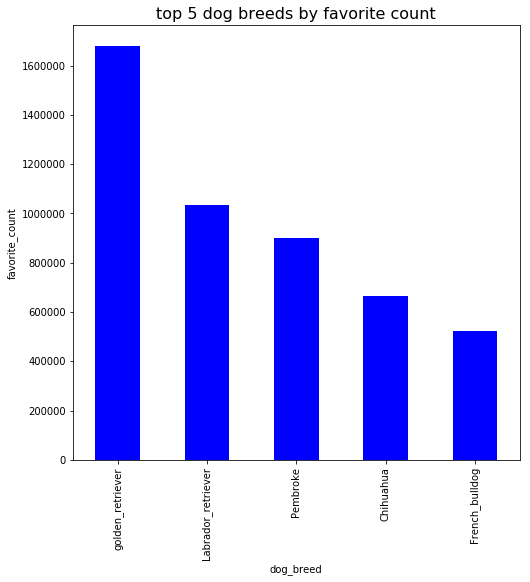

In [97]:
#plotting a barchart to visualize the top 5 dog breeds by favorite count
fav_5.plot(kind='bar',figsize=(8,8), color='b')
plt.title('top 5 dog breeds by favorite count', fontsize=16)
plt.xlabel('dog_breed')
plt.ylabel('favorite_count')
plt.figure();

### EXTERNAL RESOURCES USED

1.stackoverflow.com